In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color
import skimage

In [2]:
img = skimage.img_as_ubyte(io.imread('test.jpg'))

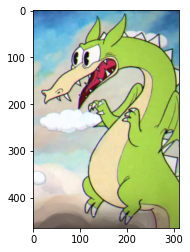

In [3]:
plt.imshow(img)

In [4]:
img = skimage.img_as_ubyte(color.rgb2gray(img))

In [5]:
img = np.where(img > 150, 0, 1)

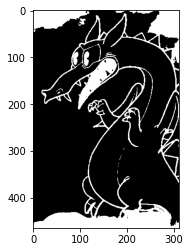

In [6]:
plt.imshow(img, cmap=plt.cm.gray)

In [7]:
from scipy.ndimage import morphology

In [8]:
mask = np.ones((3, 3))

borders = np.logical_and(img, np.logical_not(morphology.binary_erosion(img, mask)))

In [9]:
borders.sum()

11057

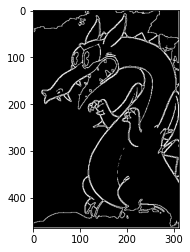

In [10]:
plt.imshow(borders, cmap=plt.cm.gray)

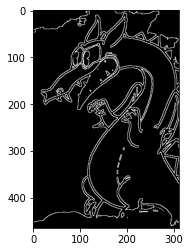

In [13]:
dilation_borders = np.logical_and(np.logical_not(img), morphology.binary_dilation(img, mask))
plt.imshow(dilation_borders, cmap=plt.cm.gray)

Думал, что дилатация произведёт что-то похожее, но не учёл, что она действительно раздвоит границы.

In [14]:
prev_filled = np.zeros_like(borders)
prev_filled[150, 120] = 1

while True:
    filled = np.logical_and(np.logical_not(borders), morphology.binary_dilation(prev_filled, border_value=0))
    if np.all(np.logical_not(np.logical_xor(prev_filled, filled))):
        break
    prev_filled = filled

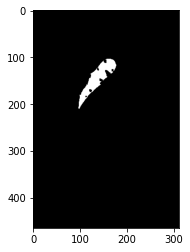

In [15]:
plt.imshow(filled, cmap=plt.cm.gray)